In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#1. Import dataset and display first 5 rows
df=pd.read_csv('tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
#2.Check column data types
df.dtypes

TV       float64
Sales    float64
dtype: object

In [4]:
#3.Check the shape of the Data Frame (rows, columns)
df.shape

(200, 2)

In [5]:
#4.Look at summary statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [6]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


TV       0
Sales    0
dtype: int64

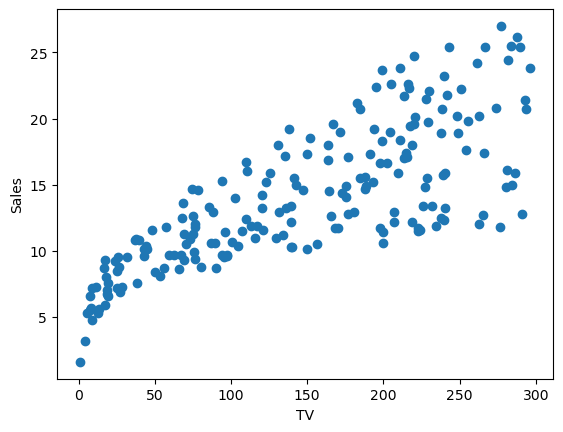

In [7]:
#5.Visualize the relationship between the features and the dependent variable using scatterplots
a=df['TV']
b=df['Sales']
plt.scatter(a,b)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [8]:
#6.Prepare X (feature variables) and y (response variable)
X=df['TV']
y=df['Sales']

In [9]:
print(X.shape,y.shape)

(200,) (200,)


In [14]:
#7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [20]:
#8. Print the shape of train data and test data
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(140,) (60,) (140,) (60,)


In [23]:
#9. Perform Linear Regression (on train data) without using any library and print the coefficients values
# Compute mean of X_train and y_train# Compute mean of X_train and y_train
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)

# Ensure X_train is a Pandas Series or NumPy array (convert if necessary)
X_train = X_train.squeeze()  # Converts DataFrame with a single column to Series
y_train = y_train.squeeze()

# Calculate the slope (m)
numerator = np.sum((X_train - X_mean) * (y_train - y_mean), axis=0)
denominator = np.sum((X_train - X_mean) ** 2, axis=0)
m = numerator / denominator

# Calculate the intercept (c)
c = y_mean - (m * X_mean)

print("Manually Calculated Coefficients:")
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")


Manually Calculated Coefficients:
Slope (m): 0.044981513047985346
Intercept (c): 7.186685130316287


In [25]:
#10.Create the model using the calculated coefficients and make predictions on the testing set
# Make predictions using manually calculated coefficients
y_pred_manual = m * X_test + c

print("Predictions on Test Data (Manual Model):")
print(y_pred_manual)



Predictions on Test Data (Manual Model):
40     16.295442
51     11.702829
139    15.503767
197    15.148413
170     9.435761
82     10.573793
183    20.123368
46     11.221527
70     16.142504
100    17.190574
179    14.635624
83     10.263421
25     19.012325
190     8.963455
159    13.110750
173    14.761572
95     14.532166
3      14.001384
41     15.148413
58     16.668788
14     16.367412
143    11.891751
12      8.257245
6       9.773122
182     9.714646
161    11.041601
128    17.096112
122    17.262544
101    20.519206
86     10.618775
64     13.083761
47     17.977750
158     7.712969
34     11.491416
38      9.125388
196    11.423944
4      15.319343
72      8.392190
67     13.452610
145    13.497591
156    11.410449
115    10.564797
155     7.371109
15     15.976073
61     18.940354
175    19.642066
120    13.542573
130     7.218172
23     17.455965
153    14.892018
31     12.265098
103    15.638711
89     12.125655
132     7.564530
109    18.674964
126     7.537541
17     

In [39]:
#11.Perform Linear Regression using library(sklearn).to_frame()
X_train = X_train.values.reshape(-1, 1)  # Convert Series to 2D array

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
#12.Print the intercept and coefficients
print("intercept : ",model.intercept_)
print("coefficients : ",model.coef_)

intercept :  7.186685130316288
coefficients :  [0.04498151]


In [ ]:
#13.Make predictions on the testing set - y_pred
# Ensure X_test is 2D
if isinstance(X_test, pd.Series):
    X_test = X_test.to_frame()  # Convert Series to DataFrame
else:
    X_test = X_test.values.reshape(-1, 1)  # Reshape if needed

# Now make predictions
y_pred = model.predict(X_test)

# Calculate R² score correctly
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)


In [ ]:
#14.Plot train data and the model
plt.scatter(X_train, y_train, color='blue', label="Train Data")  # Scatter plot of actual training data
plt.plot(X_train, model.predict(X_train), color='red', label="Model Prediction")  # Regression line
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.title("Training Data and Regression Model")
plt.legend()
plt.show()


In [ ]:
#15.Plot test data and the model
plt.scatter(X_test,y_test,label='Test Data',color='green')
plt.plot(X_test,model.predict(X_test),color='red',label="test model")
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

In [ ]:
#16.Print Mean Squared Error and R Squared Value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R Squared Value:", r2)

In [ ]:
#17.Calculate and print R Squared and Adjusted R Squared values without any library
# Compute R Squared (R²)
ss_residual = np.sum((y_test - y_pred) ** 2)  # Sum of squared residuals
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)  # Total sum of squares
r2_manual = 1 - (ss_residual / ss_total)

# Compute Adjusted R Squared
n = len(y_test)  # Number of samples
k = X_test.shape[1] if len(X_test.shape) > 1 else 1  # Number of independent variables
adjusted_r2 = 1 - ((1 - r2_manual) * (n - 1) / (n - k - 1))

print("Manual R Squared:", r2_manual)
print("Manual Adjusted R Squared:", adjusted_r2)
